In [1]:
using PyPlot, LinearAlgebra, Interact

WebIO._IJuliaInit()

## A simple least-squares fitting problem

Let's fit $m$ data points $(a_i, b_i)$ to a straight line $a(b) = x_1 + x_2 b$.  With a least-square fit, minimizing
$$f(x) = \Vert b - Ax \Vert^2/m =\frac{1}{m} \sum_i \underbrace{(b_i - (Ax)_i)^2}_{f_i(x)}\, ,$$
the solution is simply $\hat{x} = A \setminus b = (A^T A)^{-1} A^T b$ where

$$
A = \begin{pmatrix} 1 & a_1 \\ 1 & a_2 \\ \vdots & \vdots \\ 1 & a_m \end{pmatrix}
$$

Let's do that for 1000 data points given by a line $1 + 2a$ plus some noise:

In [2]:
m = 1000
a = randn(m)
b = @. 1 + 2a + randn()
A = [one.(a) a]
x̂ = A \ b

2-element Vector{Float64}:
 0.9521191433204085
 2.008982366656801

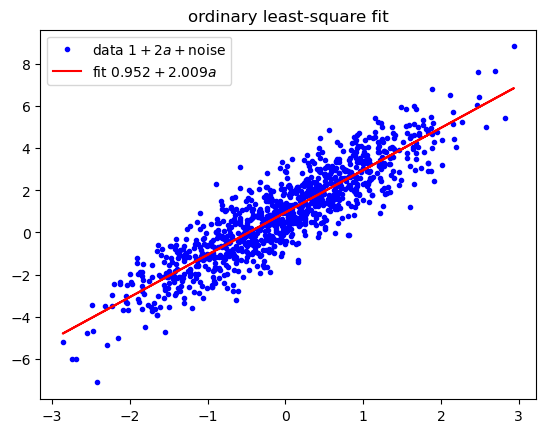

PyObject <matplotlib.legend.Legend object at 0x167706370>

In [3]:
title("ordinary least-square fit")
plot(a, b, "b.")
plot(a, x̂[1] .+ x̂[2] .* a, "r-")
legend([L"data $1+2a+\mathrm{noise}$", L"fit $%$(round(x̂[1],digits=3)) + %$(round(x̂[2],digits=3))a$"])

## Gradient descent

We can instead solve this problem by gradient descent with a fixed learning rate $s$.  At each iteration
$$
x^{(k+1)} = x^{(k)} - s \nabla f^{(k)}
$$
where for $f(x) = \frac{1}{m}\Vert b - Ax \Vert^2 = \frac{1}{m}(b-Ax)^T (b-Ax)$ we have $\nabla f = \frac{2}{m}A^T(Ax - b)$.   We'll start with an initial "guess" of $x^{(1)} = [0,0]$.

This is sometimes called **"full batch" gradient descent"**: we are looking at the **whole "batch"** of training data at once.

We'll use the [Interact.jl package](https://github.com/JuliaGizmos/Interact.jl) to visualize the progress of this algorithm as we vary the "learning rate" $s$.

For goodd convergence, we should typically have $s < 1/L$ where $L \approx 2$ is the Lipschitz constant of $f$, corresponding to the largest eigenvalue of the Hessian $2A^T A / m$.  So, convenience we'll specify $sL$ instead of $s$ — for $sL > 1$ we'll see that it "overshoots" the optimum and oscillates.

In [4]:
f(x) = norm(b-A*x)^2 / m
f(x1,x2) = f([x1,x2])
x1 = range(-2,3, length=100)
x2 = range(0,4,length=100)
fvals = f.(x1',x2)

@show L = (2/m) * maximum(eigvals(A'*A)) # Lipschitz constant

f1 = figure(figsize=(10,4))
@manipulate for sL in slider(0.05:0.05:2, value=0.3, label="s × L"),
                iterations in slider(10:100, value=20, label="# iterations")
    withfig(f1) do
        s = sL / L
        x = [0.0,0.0]
        X = [x]
        ΔX = [norm(x - x̂)]
        for i = 1:iterations
            ∇f = (2/m)*(A'*(A*x - b))
            x = x - s * ∇f
            push!(X, x)
            push!(ΔX, norm(x - x̂))
        end
        
        subplot(1,2,1)
        plt.subplots_adjust(wspace=0.4)
        contour(x1', x2, fvals)
        plot(x̂[1], x̂[2], "r*")
        plot(getindex.(X,1), getindex.(X,2), "ko-")
        xlabel(L"x_1")
        ylabel(L"x_2")
        title("gradient-descent iterates x")
        
        subplot(1,2,2)
        semilogy(ΔX, "ko-")
        ylim(1e-10, 2)
        xlabel("iteration")
        ylabel(L"\Vert x - \hat{x} \Vert")
        title("|error| in x")
    end
end

L = (2 / m) * maximum(eigvals(A' * A)) = 2.0401738586748017


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["s × L"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 40, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(6), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/stevenj/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/stevenj/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/stevenj/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/stevenj/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/stevenj/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010f445fb0, Task (runnable) @0x000000010f445fb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.05\",\"0.1\",\"0.15\",\"0.2\",\"0.25\",\"0.3\",\"0.35\",\"0.4\",\"0.45\",\"0.5\",\"0.55\",\"0.6\",\"0.65\",\"0.7\",\"0.75\",\"0.8\",\"0.85\",\"0.9\",\"0.95\",\"1.0\",\"1.05\",\"1.1\",\"1.15\",\"1.2\",\"1.25\",\"1.3\",\"1.35\",\"1.4\",\"1.45\",\"1.5\",\"1.55\",\"1.6\",\"1.65\",\"1.7\",\"1.75\",\"1.8\",\"1.85\",\"1.9\",\"1.95\"

## Stochastic gradient descent

In the most basic form of stochastic gradient descent, we look at one data point at a time, chosen at random.  More generally, we can look at "mini-batches" of $M$ data points at a time.  That is, we will only **estimate**
$$
\nabla f = E[\nabla f_i] \approx \frac{1}{M} \sum_{i \in \text{mini-batch}} \nabla f_i
$$
The simplest case is $M=1$: we only look at one data point at a time!

This is *much* cheaper than computing $\nabla f$ when the size of the training is large.   (In fact, we can even handle *infinite* training sets this way, where the training data is generated randomly as needed.)

Let's see how it works for the problem above, sampling data at random from an infinite ($m=\infty$) training set generated as needed from the same model as above, again using the simplest possible algorithm with a fixed step size:

In [5]:
x̂₀ = [1,2] # ground-truth model

f2 = figure(figsize=(10,4))
@manipulate for sL in slider(0.01:0.01:0.4, value=0.2, label="s × L"),
                M in slider(1:100, value=1, label="mini-batch M"),
                iterations in slider(10:100, value=50, label="# iterations")
    withfig(f2) do
        s = sL / L
        x = [0.0,0.0]
        X = [x]
        ΔX = [norm(x - x̂₀)]
        for i = 1:iterations
            # generate a mini-batch of size M:
            ã = randn(M)
            b̃ = @. 1 + 2ã + randn()
            Ã = [one.(ã) ã]
            
            # approximate gradient from this mini-batch
            ∇f̃ = (2/M)*(Ã'*(Ã*x - b̃))
            x = x - s * ∇f̃
            push!(X, x)
            push!(ΔX, norm(x - x̂₀))
        end
        
        subplot(1,2,1)
        plt.subplots_adjust(wspace=0.4)
        contour(x1', x2, fvals)
        plot(x̂₀[1], x̂₀[2], "r*")
        plot(getindex.(X,1), getindex.(X,2), "ko-")
        xlabel(L"x_1")
        ylabel(L"x_2")
        title("gradient-descent iterates x")
        
        subplot(1,2,2)
        semilogy(ΔX, "ko-")
        ylim(1e-2, 2)
        xlabel("iteration")
        ylabel(L"\Vert x - \hat{x} \Vert")
        title("|error| in x")
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["s × L"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 40, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(20), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/stevenj/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/stevenj/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/stevenj/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/stevenj/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/stevenj/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010f446b30, Task (runnable) @0x000000010f446b30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"0.3\",\"0.31\",\"0.32\",\"0.33\",\"0.34\",\"0.35\",\"0.36\",\"0.37\",

## The Adam algorithm for stochastic optimization

A popular algorithm for stochastic optimization is [Adam (Kingma & Ba, 2015)](https://arxiv.org/pdf/1412.6980.pdf), which adds several features:

* It has a "momentum" or "memory" term, where the gradient is estimated by a *weighted average* of the current mini-batch gradient and the previous gradient estimate.
* It also estimates the *variance* of the gradient components in the same way, and essentially uses this as an estimate of the Hessian diagonal, to take a "crude Newton"-like step where the4 gradient components are weighed inversely by the square roots of their variances.

Fortunately, it's quite simple to implement directly from the description in the paper linked above.  Let's try it!

In [6]:
x̂₀ = [1,2] # ground-truth model

# typical Adam hyper-parameters
ϵ = 1e-8
β₁ = 0.9
β₂ = 0.999

f2 = figure(figsize=(10,4))
@manipulate for log₁₀α in slider(-4:0.2:0, value=-3, label="learning rate log₁₀α"),
                M in slider(1:100, value=1, label="mini-batch M"),
                iterations in slider(10:100, value=50, label="# iterations")
    withfig(f2) do
        α = exp10(log₁₀α)
        x = [0.0,0.0]
        X = [x]
        ΔX = [norm(x - x̂₀)]
        mom = zero(x) # initial 1st-moment (mean gradient)
        var = zero(x) # initial 2nd-moment (mean gradient.^2)
        for t = 1:iterations
            # generate a mini-batch of size M:
            ã = randn(M)
            b̃ = @. 1 + 2ã + randn()
            Ã = [one.(ã) ã]
            
            # approximate gradient from this mini-batch
            ∇f̃ = (2/M)*(Ã'*(Ã*x - b̃))
            
            # Adam update
            mom = β₁*mom + (1-β₁)*∇f̃
            var = β₂*var + (1-β₂)*(∇f̃.^2)
            m̂ = mom / (1 - β₁^t) # normalize by total weights
            v̂ = var / (1 - β₂^t) # normalize by total weights
            x = @. x - α * m̂ / (√v̂ + ϵ)
            
            push!(X, x)
            push!(ΔX, norm(x - x̂₀))
        end
        
        subplot(1,2,1)
        plt.subplots_adjust(wspace=0.4)
        contour(x1', x2, fvals)
        plot(x̂₀[1], x̂₀[2], "r*")
        plot(getindex.(X,1), getindex.(X,2), "ko-")
        xlabel(L"x_1")
        ylabel(L"x_2")
        title("gradient-descent iterates x")
        
        subplot(1,2,2)
        semilogy(ΔX, "ko-")
        ylim(1e-2, 2)
        xlabel("iteration")
        ylabel(L"\Vert x - \hat{x} \Vert")
        title("|error| in x")
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["learning rate log₁₀α"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(6), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/stevenj/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/stevenj/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/stevenj/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/stevenj/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/stevenj/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000013f7db540, Task (runnable) @0x000000013f7db540), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-4.0\",\"-3.8\",\"-3.6\",\"-3.4\",\"-3.2\",\"-3.0\",\"-2.8\",\"-2.6\",\"-2.4\",\"-2.2\",\"-2.0\",\"-1.8\",\"-1.6\",\"-1.4\",\"-1.2\",\"-1.0\",\"-0.8\",\"-0.6\",\"-0.4\",\"-0.2\",\"0.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"8833924737783779547\",\"id\":\"11130957211092208953\",\"type\":\"obs

With correctly tuned hyperparameters, Adam converges much more smoothly — with *less variance* — than naive stochastic gradient descent, even for a mini-batch size $M=1$.   The "memory" effect of averaging the gradient over many iterations helps with this!

I should also point out that this is a **very well-conditioned test problem** as evidenced by the nearly circular contours of $f(x)$ as seen in these examples.    In such cases naive gradient descent often works very well, and there is not as much benefit from either momentum terms or weighting the gradient inversely with the variance.   Many realistic learning problems are badly conditioned, however, and these enhancements of Adam (and related algorithms) make a much bigger difference!

In [7]:
cond(A'A) # condition number of the Hessian

1.07122959864602

(See, well-conditioned!)